In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import tweepy 
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SILVA\AppData\Roaming\nltk_data...


In [3]:
api_key = "dzPfHbw07mHlxqWrbFXPnJ83R"
api_secret = "8lAhud69E2748mdv8eKpsRf2lwDWlBVDk8YMxjxrGLRCfhppTj"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAEHZbwEAAAAAAWZ%2FmsJH42PgVE44JaUqw8spT6M%3DDczwilpVRZtjfpRPK6l6TSjTB6l9EXAsVqVafUCabWoNLNDeh9"
acess_token = "2534496417-9rOsCGmGMi9R9kfzifhqJrzP0YxX4ejBgTu3tnf"
acess_secret = "ccLadXKnmQme8WuUIPsP3X7CUn9WvPFk56uCHWHDq6H76"

In [4]:
client = tweepy.Client(bearer_token=bearer_token)

In [5]:
query = '''ireland milk -is:retweet lang:en'''
tweets = client.search_recent_tweets(query=query,
                                     tweet_fields = ["geo", "text", "source", "context_annotations"],
                                     user_fields = ["location"],
                                     max_results = 100,
                                     )

In [6]:
tweets

Response(data=[<Tweet id=1528397098797805568 text='Harvey Milk, one of the first openly gay US politicians, was born on May 22, 1930. Ireland legalized gay marriage on May 22, 2015\n\nHinduism teaches us that every being is Divine or a reflection of Divine qualities, regardless of one’s outer attributes.\n\n#Respect #LGBTQ #equity'>, <Tweet id=1528390258089500672 text='Not only is it Irish Marriage Referendum Day (The day LGBTQIA+ Marriage was made legal in Ireland in 2015) but also Harvey Milk Day (A gay rights activist who was unfortunately assassinated in 1978)\n#LGBTQ #LGBTQIALOVEMAY https://t.co/gEpBhpdSHx'>, <Tweet id=1528332121143746560 text='@c_tiot Bloody right mate, I\'m from Ireland, there was these two lads in the supermarket and one dropped a bottle of milk, his mate goes to him "you are one dopey Biden bollox" and I burst out laughing,how\'s it feel @JoeBiden fake @Potus to know you are a world wide laughing stock?🇮🇪🇬🇧🇺🇸'>, <Tweet id=1528314850019000320 text="On Sunday's 

In [7]:
tweets.data[0].geo

In [8]:
tweets.data[0].source

'Twitter for Android'

In [9]:
tweets.data[0].context_annotations

[{'domain': {'id': '152',
   'name': 'Food',
   'description': 'Topics about food, like Donuts or Brunch'},
  'entity': {'id': '850419241790472192',
   'name': 'Milk',
   'description': 'Milk'}},
 {'domain': {'id': '173',
   'name': 'Google Product Taxonomy',
   'description': 'A product taxonomy created by Google'},
  'entity': {'id': '850419241790472192',
   'name': 'Milk',
   'description': 'Milk'}},
 {'domain': {'id': '65',
   'name': 'Interests and Hobbies Vertical',
   'description': 'Top level interests and hobbies groupings, like Food or Travel'},
  'entity': {'id': '847896364256067584',
   'name': 'Society',
   'description': 'Society'}},
 {'domain': {'id': '66',
   'name': 'Interests and Hobbies Category',
   'description': 'A grouping of interests and hobbies entities, like Novelty Food or Destinations'},
  'entity': {'id': '847896538105782272',
   'name': 'Marriage',
   'description': 'Marriage'}}]

In [10]:
tweets_ireland = {}
tweets_ireland["tweet"] = []
for tweet in tweets.data:
    tweets_ireland["tweet"].append(tweet.text)

In [11]:
df_ireland = pd.DataFrame(tweets_ireland)

In [12]:
df_ireland["tweet"] = df_ireland["tweet"].str.replace("\n","")

In [13]:
df_ireland

,tweet
0,"Harvey Milk, one of the first openly gay US po..."
1,Not only is it Irish Marriage Referendum Day (...
2,"@c_tiot Bloody right mate, I'm from Ireland, t..."
3,"On Sunday's we STACK 🥰Join us for live music, ..."
4,@Mozzer2015 @LePatissier1 @Aldi_Ireland @Tesco...
...,...
95,@CitznOfNowhere @neilclan @OxfordDiplomat A bo...
96,@KnoxTony @hilarybennmp Why would people smugg...
97,"@donalhassett1 Living away from Ireland, the t..."
98,@hilarybennmp Please try to think into the min...


In [14]:
query = '''us milk -is:retweet lang:en'''
tweets = client.search_recent_tweets(query=query,
                                     tweet_fields = ["geo", "text", "source", "context_annotations"],
                                     user_fields = ["location"],
                                     max_results = 100,
                                     )

In [15]:
tweets_us = {}
tweets_us["tweet"] = []
for tweet in tweets.data:
    tweets_us["tweet"].append(tweet.text)

In [16]:
df_us = pd.DataFrame(tweets_us)

In [17]:
df_us["tweet"] = df_us["tweet"].str.replace("\n","")

In [18]:
df_us

,tweet
0,Happy #HarveyMilkDayTo think of Harvey Milk to...
1,NYC street food vendor attacked in Times Squar...
2,@AP Capitalism failure in US milk formula supply
3,@spanishcossack @RALee85 Fuck your own people ...
4,Most baby formula sold in the US is cow’s milk...
...,...
95,@ASAPfugo @thefaerest Wait this makes sense ca...
96,"The evidence has been with us all along, and f..."
97,NYC street food vendor attacked in Times Squar...
98,@zimmermannwife milk and mocha are an alternat...


### Machine Learning

#### data frame used in class to train the model 

In [19]:
df = pd.read_csv('../data/clothing_review.csv')

In [20]:
df = df.drop(['Title', 'Positive Feedback Count', 'Unnamed: 0', ], axis=1)
df.dropna(inplace=True)

In [21]:
df['Polarity_Rating'] = df['Rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [22]:
df_Positive = df[df['Polarity_Rating'] == 'Positive'][0:8000]
df_Neutral = df[df['Polarity_Rating'] == 'Neutral']
df_Negative = df[df['Polarity_Rating'] == 'Negative']

In [23]:
df_Neutral_over = df_Neutral.sample(8000, replace=True)
df_Negative_over = df_Negative.sample(8000, replace=True)
df = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)

In [24]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [25]:
df['review'] = df['Review Text'].apply(get_text_processing)

In [26]:
df = df[['review', 'Polarity_Rating']]

In [27]:
df

,review,Polarity_Rating
0,Absolutely wonderful silky sexy comfortable,Positive
1,Love dress sooo pretty happened find store im ...,Positive
3,love love love jumpsuit fun flirty fabulous ev...,Positive
4,shirt flattering due adjustable front tie perf...,Positive
6,aded basket hte last mintue see would look lik...,Positive
...,...,...
8697,couldnt wait get top mail since didnt local re...,Negative
19275,looked like simple chic blouse fabric felt che...,Negative
6458,Wow sure close fitting suction cups body yikes...,Negative
2612,fabric texture didnt meet expectations unfortu...,Negative


In [28]:
one_hot = pd.get_dummies(df["Polarity_Rating"])
df_ = df.copy()
df_.drop(['Polarity_Rating'],axis=1,inplace=True)
df_ = pd.concat([df_,one_hot],axis=1)

In [29]:
df_

,review,Negative,Neutral,Positive
0,Absolutely wonderful silky sexy comfortable,0,0,1
1,Love dress sooo pretty happened find store im ...,0,0,1
3,love love love jumpsuit fun flirty fabulous ev...,0,0,1
4,shirt flattering due adjustable front tie perf...,0,0,1
6,aded basket hte last mintue see would look lik...,0,0,1
...,...,...,...,...
8697,couldnt wait get top mail since didnt local re...,1,0,0
19275,looked like simple chic blouse fabric felt che...,1,0,0
6458,Wow sure close fitting suction cups body yikes...,1,0,0
2612,fabric texture didnt meet expectations unfortu...,1,0,0


In [30]:
X = df_['review'].values
y = df_.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
vect = CountVectorizer(max_features=5000)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [32]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [33]:
model = Sequential()

model.add(Dense(units=5000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=400,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [38]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/100
66/66 [==============================] - 17s 252ms/step - loss: 0.7561 - accuracy: 0.6513 - val_loss: 0.4601 - val_accuracy: 0.8242
Epoch 2/100
66/66 [==============================] - 19s 282ms/step - loss: 0.2632 - accuracy: 0.9121 - val_loss: 0.3180 - val_accuracy: 0.8922
Epoch 3/100
66/66 [==============================] - 16s 243ms/step - loss: 0.0798 - accuracy: 0.9774 - val_loss: 0.2913 - val_accuracy: 0.9183
Epoch 4/100
66/66 [==============================] - 16s 238ms/step - loss: 0.0208 - accuracy: 0.9952 - val_loss: 0.3854 - val_accuracy: 0.9106
Epoch 5/100
66/66 [==============================] - 15s 233ms/step - loss: 0.0084 - accuracy: 0.9981 - val_loss: 0.3911 - val_accuracy: 0.9211
Epoch 00005: early stopping


In [39]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

113/113 [==============================] - 4s 33ms/step - loss: 0.3911 - accuracy: 0.9211
Test accuracy: 0.9211111068725586


In [40]:
sid = SentimentIntensityAnalyzer()

In [41]:
X = df['review'].values
y = df.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [42]:
X_test

array(['price amazing goes everything fits great glad made purchase',
       'Im 57 130 lbs ordered mediumregular dress fell three inches knees model taller falls kneesdoesnt make sense think retailer sends petites place regular',
       'Adorable foxes smitten store fix bizarre foxes dont come high youre limited length wear bought ml based salesperson advice cant imagine trying anything smaller usually wear size 4 bottom super snug back store went',
       ...,
       'Love retailers kimonos saw pattern unfortunately bought tag already showing holes gave 15 went wear first time already huge snag love retailer 98 worth money',
       'purchased dress 50th birthday bash stunning fit perfect buy size could worn regular size incredibly flattering elegant well made one go black dresses summer',
       'great dark wash fit true size every stevies reference 56 145lbs size 6m 29 fit perfect bit long fold looks cute highly recommend especially since sale definitely closet staple'],
      dtype

In [43]:
results = []
for text in X_test:
    result = sid.polarity_scores(text)["compound"]
    if result < -0.05:
        results.append("Negative")
    elif result < 0.05:
        results.append("Neutral")
    else:
        results.append("Positive")

In [44]:
results = np.array(results)

In [45]:
y_test

array([['Positive'],
       ['Negative'],
       ['Negative'],
       ...,
       ['Negative'],
       ['Positive'],
       ['Positive']], dtype=object)

In [46]:
accuracy_score(y_test,results)

0.38027777777777777

#### Test  the Reserach model Twitter Milk - Data Frame collected on  research 

In [47]:
df_ireland['tweet'] = df_ireland['tweet'].apply(get_text_processing)
df_us['tweet'] = df_us['tweet'].apply(get_text_processing)

In [48]:
df_ireland

,tweet
0,Ride4Truth Ireland apparently inflation rate 8...
1,Milk Fat Fractions Market Worth 14 Billion 202...
2,land milk honey promised BREXIT materialised N...
3,melatoninmilk Yeah Exactly It’s projection tru...
4,capedjoosader DarranMarshall annaturley alexha...
...,...
95,Someone actually tried bring 2 litres milk air...
96,yesterday six one news Ireland heard people ta...
97,johnmcguirk jasonomahony Indeed many opportuni...
98,Republic Ireland fixed milk volumes receive 8c...


In [34]:
vec_ireland = vect.transform(df_ireland['tweet'])
vec_us = vect.transform(df_us['tweet'])

In [35]:
vec_ireland = tfidf.transform(vec_ireland)
vec_us = tfidf.transform(vec_us)
vec_ireland = vec_ireland.toarray()
vec_us = vec_us.toarray()

In [36]:
df_ireland["sentiment"] = np.argmax(model.predict(vec_ireland),axis=1)

4/4 [==============================] - 9s 74ms/step


In [37]:
def number_to_sentiment(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    return "Positive"

In [38]:
df_ireland["sentiment"] = df_ireland["sentiment"].apply(number_to_sentiment)

In [39]:
df_us["sentiment"] = np.argmax(model.predict(vec_us),axis=1)
df_us["sentiment"] = df_us["sentiment"].apply(number_to_sentiment)

4/4 [==============================] - 0s 23ms/step


<AxesSubplot:>

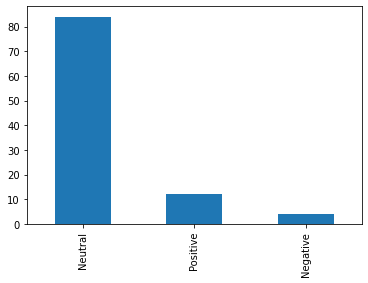

In [40]:
df_ireland["sentiment"].value_counts().plot.bar()

<AxesSubplot:>

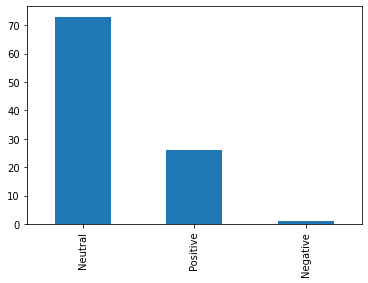

In [41]:
df_us["sentiment"].value_counts().plot.bar()